https://courses.edx.org/courses/course-v1:MITx+15.071x_3+1T2016/courseware/3372864201764d6d9f63931920e5152e/81e7350ea002415d9d76af945d7d0650/

In [85]:
stevens = read.csv("stevens.csv")

In [86]:
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [87]:
summary(stevens)

     Docket         Term         Circuit                  Issue    
 00-1011:  1   Min.   :1994   9th    :122   CriminalProcedure:132  
 00-1045:  1   1st Qu.:1995   5th    : 53   JudicialPower    :102  
 00-1072:  1   Median :1997   11th   : 49   EconomicActivity : 98  
 00-1073:  1   Mean   :1997   7th    : 47   CivilRights      : 74  
 00-1089:  1   3rd Qu.:1999   4th    : 46   DueProcess       : 43  
 00-121 :  1   Max.   :2001   8th    : 44   FirstAmendment   : 39  
 (Other):560                  (Other):205   (Other)          : 78  
               Petitioner               Respondent    LowerCourt 
 OTHER              :175   OTHER             :177   conser :293  
 CRIMINAL.DEFENDENT : 89   BUSINESS          : 80   liberal:273  
 BUSINESS           : 79   US                : 69                
 STATE              : 48   CRIMINAL.DEFENDENT: 58                
 US                 : 48   STATE             : 56                
 GOVERNMENT.OFFICIAL: 38   EMPLOYEE          : 28           

In [88]:
library(caTools)

In [89]:
set.seed(3000)

In [90]:
split = sample.split(stevens$Reverse, SplitRatio = 0.70)

In [91]:
Train = subset(stevens, split == TRUE)

In [92]:
Test = subset(stevens, split == FALSE)

In [93]:
str(Train)

'data.frame':	396 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 69 97 242 334 436 504 507 526 155 426 ...
 $ Term      : int  1994 1995 1996 1997 1999 1999 2000 2000 1994 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 11 9 13 12 2 4 8 11 9 5 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 9 5 5 3 5 5 4 5 6 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 1 1 1 1 1 1 2 2 2 ...
 $ Unconst   : int  0 0 0 0 0 0 1 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 1 1 1 0 0 ...


In [94]:
library(rpart)

In [95]:
.Library

[1] "/home/varun/anaconda3/lib64/R/library"

In [96]:
library(rpart.plot)

In [97]:
StevensTree = rpart(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, method = "class", minbucket=25)

In [98]:
summary(StevensTree)

Call:
rpart(formula = Reverse ~ Circuit + Issue + Petitioner + Respondent + 
    LowerCourt + Unconst, data = Train, method = "class", minbucket = 25)
  n= 396 

          CP nsplit rel error    xerror       xstd
1 0.21666667      0 1.0000000 1.0000000 0.05504819
2 0.05277778      1 0.7833333 0.8833333 0.05419418
3 0.02407407      3 0.6777778 0.8444444 0.05376462
4 0.01666667      6 0.6055556 0.8611111 0.05395780
5 0.01000000      7 0.5888889 0.8388889 0.05369717

Variable importance
Respondent Petitioner LowerCourt    Circuit      Issue    Unconst 
        29         20         20         15         14          1 

Node number 1: 396 observations,    complexity param=0.2166667
  predicted class=1  expected loss=0.4545455  P(node) =1
    class counts:   180   216
   probabilities: 0.455 0.545 
  left son=2 (185 obs) right son=3 (211 obs)
  Primary splits:
      LowerCourt splits as  RL, improve=15.803830, (0 missing)
      Respondent splits as  RRLLLRLLLLRL, improve=12.595160, (0 missi

In [99]:
library(rpart.plot)

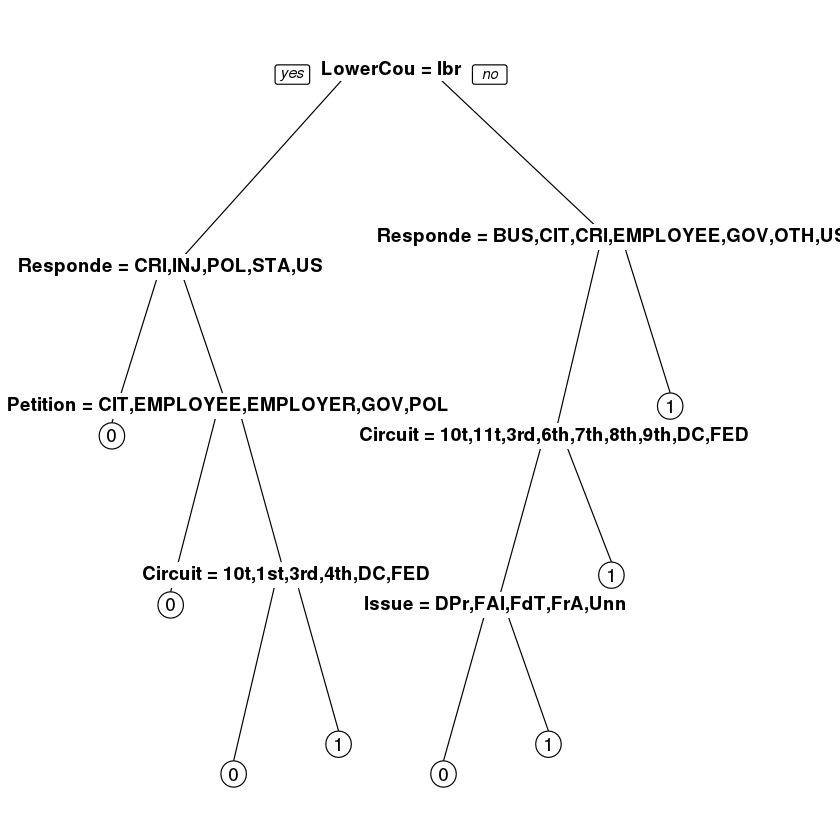

In [100]:
prp(StevensTree)

In [101]:
PredictCart = predict(StevensTree,newdata = Test,type = "class")

In [102]:
table(Test$Reverse,PredictCart)

   PredictCart
     0  1
  0 41 36
  1 22 71

In [103]:
(41+71)/(41+71+36+22)

[1] 0.6588235

In [104]:
library(ROCR)

In [105]:
PredictROC = predict(StevensTree,newdata = Test)

In [106]:
str(PredictROC)

 num [1:170, 1:2] 0.304 0.304 0.4 0.4 0.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:170] "1" "3" "4" "6" ...
  ..$ : chr [1:2] "0" "1"


In [107]:
summary(PredictROC)

       0                 1         
 Min.   :0.07547   Min.   :0.2090  
 1st Qu.:0.30357   1st Qu.:0.2400  
 Median :0.40000   Median :0.6000  
 Mean   :0.42934   Mean   :0.5707  
 3rd Qu.:0.76000   3rd Qu.:0.6964  
 Max.   :0.79104   Max.   :0.9245  

In [108]:
pred = prediction(PredictROC[,2],Test$Reverse)

In [109]:
perf = performance(pred,"tpr","fpr")

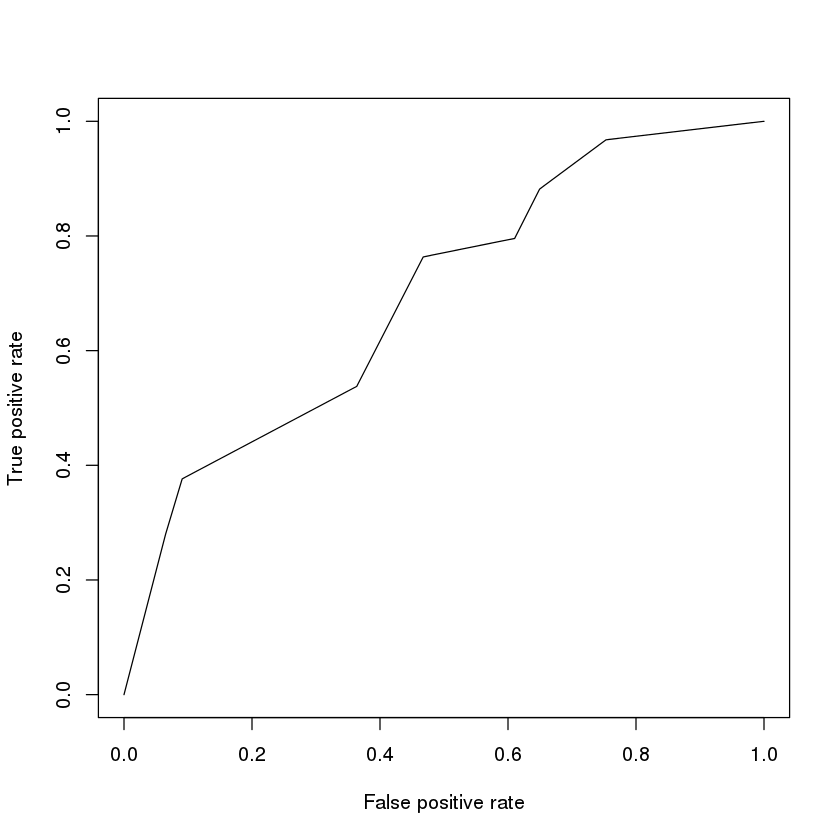

In [110]:
plot(perf)

In [111]:
auc = as.numeric(performance(pred,"auc")@y.values)

In [112]:
auc

[1] 0.6927105

In [113]:
StevensTree2 = rpart(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, method = "class", minbucket=100)

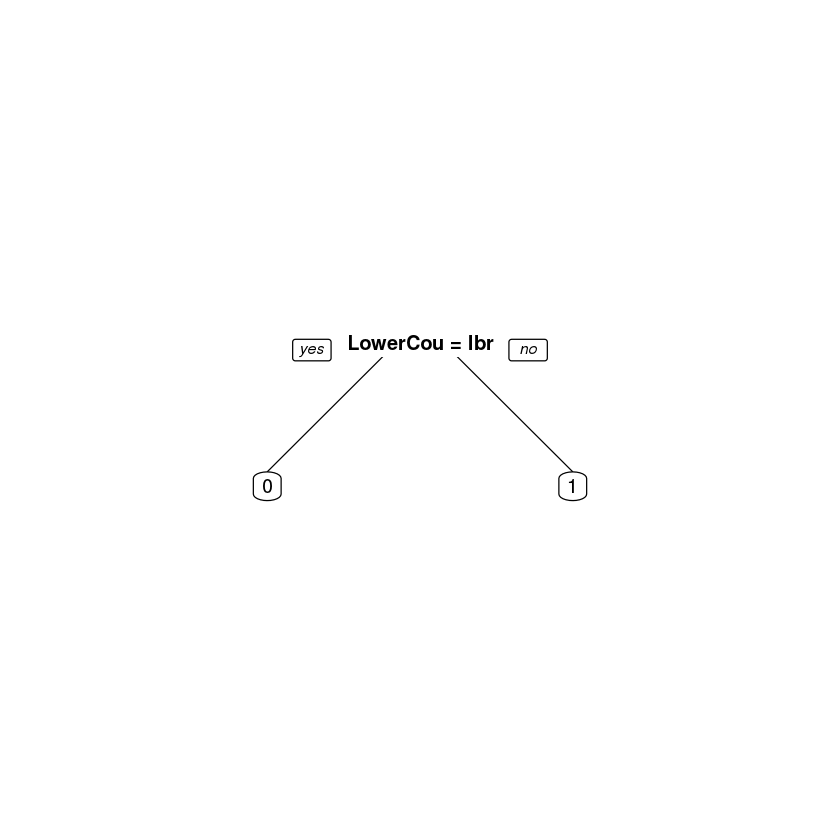

In [114]:
prp(StevensTree2)

In [115]:
StevensTree3 = rpart(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, method = "class", minbucket=5)

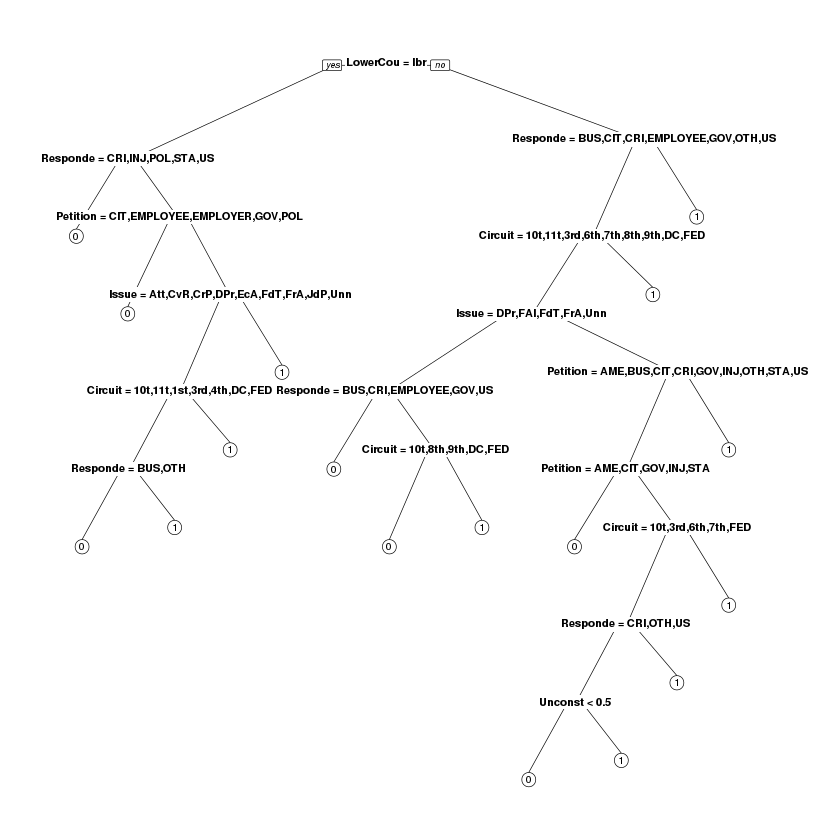

In [116]:
prp(StevensTree3)

In [117]:
library(randomForest)

In [118]:
StevensForest = randomForest(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, nodesize = 25, ntree = 200)

Warning message:
In randomForest.default(m, y, ...): The response has five or fewer unique values.  Are you sure you want to do regression?

### You should see an interesting warning message here.
In CART, we added the argument method="class",
so that it was clear that we're doing a classification problem.
As I mentioned earlier, trees can also
be used for regression problems, which
you'll see in the recitation.
The randomForest function does not have a method argument.
So when we want to do a classification problem,
we need to make sure outcome is a factor.
Let's convert the variable Reverse to a factor variable

In [119]:
Train$Reverse = as.factor(Train$Reverse)
Test$Reverse = as.factor(Test$Reverse)

In [120]:
StevensForest = randomForest(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, nodesize = 25, ntree = 200)

In [121]:
PredictForest = predict(StevensForest, newdata = Test)

In [122]:
table(Test$Reverse,PredictForest)

   PredictForest
     0  1
  0 40 37
  1 19 74

In [123]:
(40+74)/(40+74+37+19)

[1] 0.6705882

In [124]:
set.seed(100)

In [125]:
StevensForest = randomForest(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, nodesize = 25, ntree = 200)

In [126]:
PredictForest = predict(StevensForest, newdata = Test)

In [127]:
table(Test$Reverse,PredictForest)

   PredictForest
     0  1
  0 43 34
  1 19 74

In [128]:
(43+74)/(43+74+34+19)

[1] 0.6882353

In [129]:
set.seed(200)

In [130]:
StevensForest = randomForest(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, nodesize = 25, ntree = 200)

In [131]:
PredictForest = predict(StevensForest, newdata = Test)

In [132]:
table(Test$Reverse,PredictForest)

   PredictForest
     0  1
  0 44 33
  1 17 76

In [133]:
(44+76)/(44+76+33+17)

[1] 0.7058824

### CROSS VALIDATION

In [134]:
getwd()

[1] "/home/varun/Projects/Statistics/Analytics_Edge/Week4"

In [135]:
library(caret)

In [136]:
library(e1071)

In [137]:
numFolds = trainControl(method = "cv",number = 10)

In [138]:
cpGrid = expand.grid(.cp=seq(0.01,0.5,0.01))

In [139]:
summary(cpGrid)

      .cp        
 Min.   :0.0100  
 1st Qu.:0.1325  
 Median :0.2550  
 Mean   :0.2550  
 3rd Qu.:0.3775  
 Max.   :0.5000  

In [140]:
class(cpGrid)

[1] "data.frame"

In [141]:
train(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst,data = Train, method = "rpart", trControl = numFolds, 
      tuneGrid = cpGrid)

CART 

396 samples
  8 predictors
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 357, 356, 357, 356, 357, 356, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa        Accuracy SD  Kappa SD  
  0.01  0.6433974  0.267916905  0.081763121  0.16808126
  0.02  0.6359615  0.248964339  0.067658798  0.14237916
  0.03  0.6208974  0.225208239  0.068926868  0.14482911
  0.04  0.6333974  0.258053232  0.072912702  0.15300304
  0.05  0.6436538  0.283134471  0.064841503  0.13050800
  0.06  0.6436538  0.283134471  0.064841503  0.13050800
  0.07  0.6436538  0.283134471  0.064841503  0.13050800
  0.08  0.6436538  0.283134471  0.064841503  0.13050800
  0.09  0.6436538  0.283134471  0.064841503  0.13050800
  0.10  0.6436538  0.283134471  0.064841503  0.13050800
  0.11  0.6436538  0.283134471  0.064841503  0.13050800
  0.12  0.6436538  0.283134471  0.064841503  0.13050800
  0.13  0.6436538  0.283134471  0.064841503  0.1305

In [142]:
StevensTreeCV = rpart(Reverse~ Circuit+Issue+Petitioner+Respondent+LowerCourt+Unconst, data = Train, method = "class", cp=0.19)

In [143]:
PredictCV = predict(StevensTreeCV,newdata = Test, type = "class")

In [144]:
table(Test$Reverse,PredictCV)

   PredictCV
     0  1
  0 59 18
  1 29 64

In [146]:
(59+64)/(59+18+29+64)

[1] 0.7235294

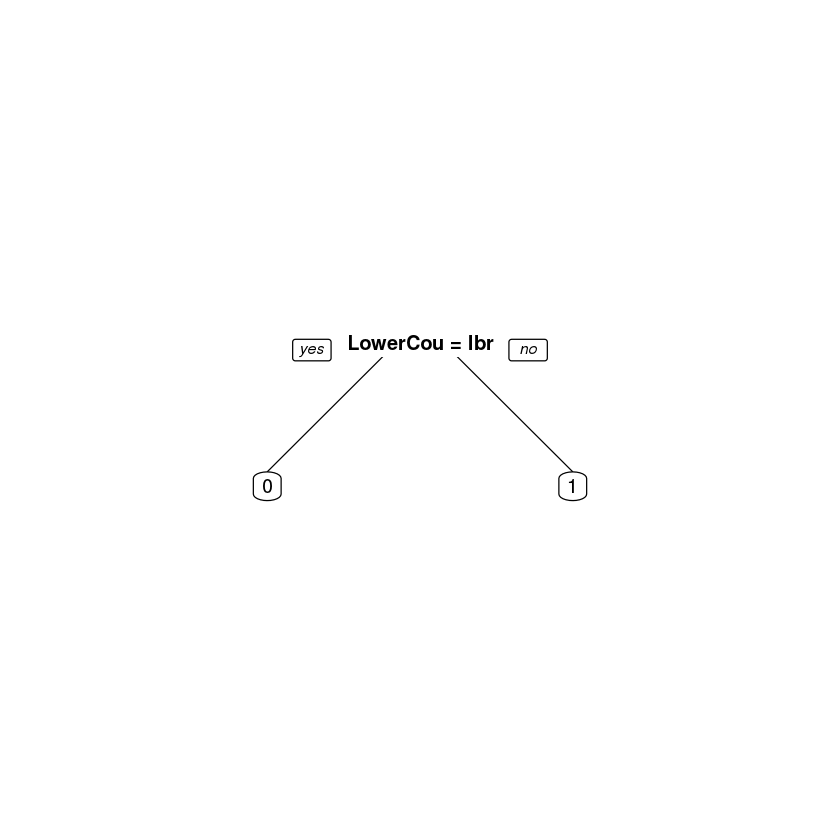

In [148]:
prp(StevensTreeCV)